# Week 2: A/B Testing I
## AIM-5014-1A: Experimental Optimization
### David Sweet // 20230608

# Q1, 5 points

You are a machine learning engineer for a video streaming service. You have engineered a new feature and added it to the input vector of your team's neural network. The out-of-sample prediction quality metrics for your new model (model B) are all superior to the current model (model A).

a) A junior MLE says, "Great! Let's swap your new model in for the current one." What do you reply?

Your team's business metric (BM) is \[time viewed\] / stream. The current production system, which is based on model A, gets 7.3s $\pm$ 1s of viewing time per stream. Your team's quarterly goal is to increase that by 2% -- but Rome wasn't built in a day. If your feature improved viewing time by only 1/3 of the goal, it would still be a win. After all, the whole team is working on other system improvements in an attempt to get all the way to the 2% goal.

Your task is to design an A/B test to decide whether to accept your new model, model B, as a permanent change to the system.

b) What is the minimum number of observations (individual measurements) that will you need? Show your work.


## Answer 1A

It's good that you've got a better model. But, a better offline doesn't mean that it'll perform better in online (deployed) mode. It needs a further investigation to finalize it.

## Answer 1b

In [180]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Business metric of A
bm_a = 7.3
# Practical significance level
ps = (1/3) * .02 * bm_a
print (f"PS = {ps:.4f}")

# Standard error of business metric of A
se_a = 1.0

# Estimated se of delta = y_b - y_a
se_delta = np.sqrt(2 * se_a**2)

# Minimum number of observations
n = int( (2.5 * se_delta / ps)**2 + 0.5)
print (f"N = {n}")
se_delta

PS = 0.0487
N = 5278


1.4142135623730951

# Answer 2

The function below, `observe(version)`, produces a single observation of a version of the system, where `version = A` or `version = B`. It emulates a production system.

Write a program (one or more functions or classes, as you see fit) to design, measure, and analyze an experiment (an A/B test). If you need to take observations before running the A/B test, take no more than 30 observations of version A and none of version B.

In [89]:
import numpy as np
_n_obs = 0
def observe(version: str):
    global _n_obs
    offset = 0.5*(_n_obs % 2)
    _n_obs += 1
    if version == "A":
        offset += 0.0
    elif version == "B":
        offset += 0.25
    else:
        assert False, f'version must be "A" or "B". Got {version}'
    return offset + 2*np.random.normal()

In [90]:
# Generating 30 observations of model A
for i in range(30):
    print(observe("A"))

1.0906960199117444
1.0846149621255177
-1.3641751086986977
1.5287350732081768
-1.3112490088690032
1.7337015266557827
4.123217062679282
-0.3991869802537361
-2.58963253547996
1.7640071556078418
3.2179964158094427
0.4112888286824208
0.5535471660800155
-2.175607982342768
-0.2674861643999718
1.1742020039125198
0.6660251437939413
-2.0219633585849017
0.7482804067691564
2.3309746963976465
0.6171824745032557
-3.27224530749258
-1.1107297697370755
-0.2760626896707381
-2.870693701641998
4.4088707138221634
-0.3616111803328409
-2.4626153994710673
-0.16547832865777617
2.0745777590036205


Standard error of A: 0.3026356172785643
Standard error of B: 0.3026356172785643
Standard error delta: 0.427991394412499
Standard error of A: 0.2648415049891305
Standard error of B: 0.2648415049891305
Standard error delta: 0.37454244823493005
Standard error of A: 0.28910934899180313
Standard error of B: 0.28910934899180313
Standard error delta: 0.4088623623530643
Standard error of A: 0.3169319497086038
Standard error of B: 0.3169319497086038
Standard error delta: 0.44820946162725517
Standard error of A: 0.2573288836560747
Standard error of B: 0.2573288836560747
Standard error delta: 0.3639179972567491
Standard error of A: 0.2750956133100272
Standard error of B: 0.2750956133100272
Standard error delta: 0.38904394729238495
Standard error of A: 0.3097297380720346
Standard error of B: 0.3097297380720346
Standard error delta: 0.43802399625173766
Standard error of A: 0.2555812314201023
Standard error of B: 0.2555812314201023
Standard error delta: 0.3614464437623253
Standard error of A: 0.2538

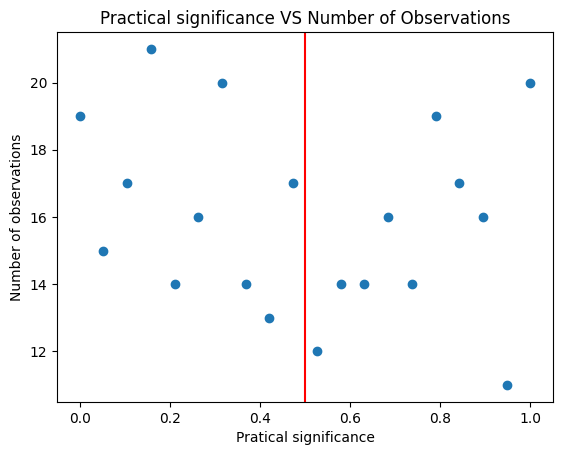

In [152]:
def design(practical_significance_level):
    # Estimate sigma_delta by pilot study
    y_a = [] # Initializing A and B
    y_b = []
    for _ in range(100):
        if np.random.uniform() < .5: # randomize with equal weight
            y_a.append(observe("A"))  # Appending single observation to A
        else:
            y_b.append(observe("B")) # Appending single observation to B
    se_a_est = np.std(y_a) / np.sqrt(len(y_a))
    se_b_est = se_a_est  # reasonable approximation
    se_delta_est = np.sqrt(se_a_est**2 + se_b_est**2)
    print("Standard error of A:", se_a_est)
    print("Standard error of B:", se_b_est)
    print("Standard error delta:", se_delta_est)
    
    num_observations = int(np.ceil( (2.5*se_delta_est / practical_significance_level)**2 ))
    return num_observations

n_obss = []
prac_s = np.linspace(0, 1, 20)
for i in prac_s:
    n_obss.append(design(0.25))

plt.scatter(prac_s,n_obss)
plt.axvline(prac_s.mean(), color='red')
plt.title("Practical significance VS Number of Observations")
plt.xlabel("Pratical significance")
plt.ylabel("Number of observations");

In [153]:
def measure(num_observations):
    y_a = []
    y_b = []   
    
    while (
        len(y_a) < num_observations
        and len(y_b) < num_observations
    ):  # replicate
        if np.random.uniform() < .5: # randomize
            y_a.append(observe("A"))
        else:
            y_b.append(observe("B"))
    return np.array(y_a), np.array(y_b)    

y_a, y_b = measure(3) 
print(f"A: {y_a}, B: {y_b}")

A: [0.03625529 1.10192758 1.94503732], B: [-0.01949183]


In [157]:
def analyze(y_a, y_b, practical_significance_level):
    delta_bar = y_b.mean() - y_a.mean()
    se_a = y_a.std() / np.sqrt(len(y_a))
    se_b = y_b.std() / np.sqrt(len(y_b))
    se_delta_bar = np.sqrt(se_a**2 + se_b**2)
    
    t = delta_bar / se_delta_bar

    # check practical significance and statistical significance
    if delta_bar > practical_significance_level and t > 1.64:
        return t, delta_bar, "Accept B"
#         return f"t = {t:.2f}, delta_bar = {delta_bar:.2f}: Accept B"
#     return f"t = {t:.2f}, delta_bar = {delta_bar:.2f}: Reject B"
    return t, delta_bar, "Reject B"

analyze(y_a, y_b, 0.015)

(-2.3224208916445486, -1.047231887879235, 'Reject B')

In [171]:
practical_significance_level = .025
num_observations = design(practical_significance_level)
print (f"num_observations = {num_observations}")
t, delta_b, decision = analyze(*measure(num_observations), practical_significance_level)
print(f"T: {t}, delta B: {delta_b}, Decision: {decision}")

Standard error of A: 0.2645084718478402
Standard error of B: 0.2645084718478402
Standard error delta: 0.37407146824979765
num_observations = 1400
T: 4.2644601937765625, delta B: 0.32886166822282403, Decision: Accept B


In [176]:
le = LabelEncoder()
decisions = []
ts = []
delta_bs = []
n_obss = [] 
for i in range(30):
    num_observations = design(practical_significance_level)
#     print (f"num_observations = {num_observations}")
    t, deltab, decision = analyze(*measure(num_observations), practical_significance_level)
    n_obss.append(num_observations)
    delta_bs.append(delta_b)
    decisions.append(decision)
    
decisions = le.fit_transform(decisions)

Standard error of A: 0.2940018683599413
Standard error of B: 0.2940018683599413
Standard error delta: 0.41578142959765835
Standard error of A: 0.2953235008288279
Standard error of B: 0.2953235008288279
Standard error delta: 0.4176505001596304
Standard error of A: 0.2696726053171561
Standard error of B: 0.2696726053171561
Standard error delta: 0.38137465584000896
Standard error of A: 0.2795004980625108
Standard error of B: 0.2795004980625108
Standard error delta: 0.3952733950500378
Standard error of A: 0.24597621696334865
Standard error of B: 0.24597621696334865
Standard error delta: 0.3478629020507946
Standard error of A: 0.28275420210549224
Standard error of B: 0.28275420210549224
Standard error delta: 0.3998748274355703
Standard error of A: 0.27412251333483767
Standard error of B: 0.27412251333483767
Standard error delta: 0.38766777610992703
Standard error of A: 0.299352646103712
Standard error of B: 0.299352646103712
Standard error delta: 0.42334857205214294
Standard error of A: 0.2

<Axes: >

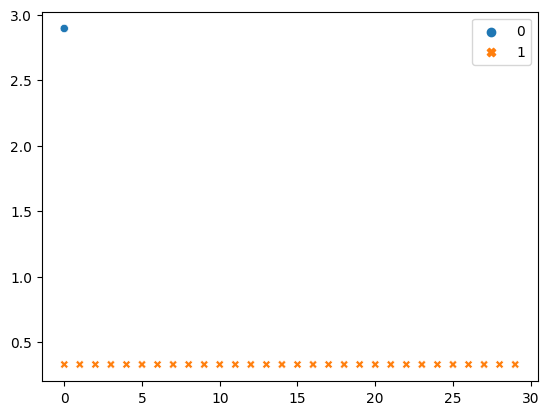

In [187]:
sns.scatterplot([t, delta_bs ])